In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff


In [2]:
data_pd = pd.read_csv('COCO_COLA.csv', index_col = 'Date');

In [28]:
data_pd

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133    806400
1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   1574400
1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374    844800
1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   1420800
1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   2035200
...               ...        ...        ...        ...        ...       ...
2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998  31362800
2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999  24806600
2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001  24923800
2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002  24696900
2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000  51874400

[15096 rows x 6 columns]

In [29]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6+ KB


In [30]:
data_pd.describe()

Open          High           Low         Close     Adj Close   
count  15096.000000  15096.000000  15096.000000  15096.000000  15096.000000  \
mean      16.056202     16.188428     15.921876     16.060734     11.367487   
std       16.939301     17.064336     16.811753     16.941712     14.253637   
min        0.192708      0.193359      0.182292      0.192057      0.037855   
25%        0.860677      0.869792      0.854167      0.860352      0.242312   
50%        9.328125      9.398438      9.218750      9.351562      4.642848   
75%       28.875000     29.167500     28.563125     28.901562     17.251080   
max       59.810001     60.130001     59.619999     60.130001     58.650002   

             Volume  
count  1.509600e+04  
mean   9.032904e+06  
std    7.935744e+06  
min    7.680000e+04  
25%    2.812800e+06  
50%    7.585200e+06  
75%    1.291275e+07  
max    1.241690e+08

In [31]:
data_pd.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

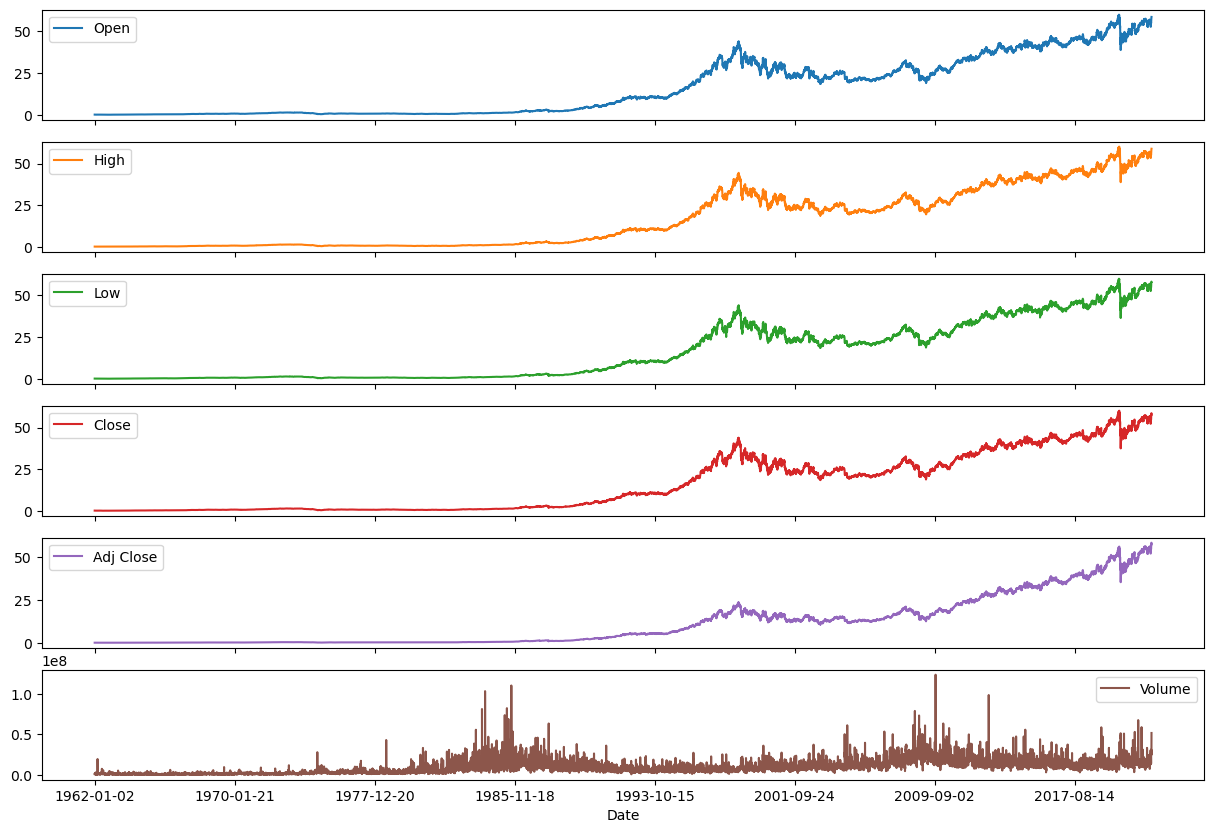

In [32]:
data_pd.plot(subplots=True, figsize=(15,10))

<AxesSubplot:xlabel='Date'>

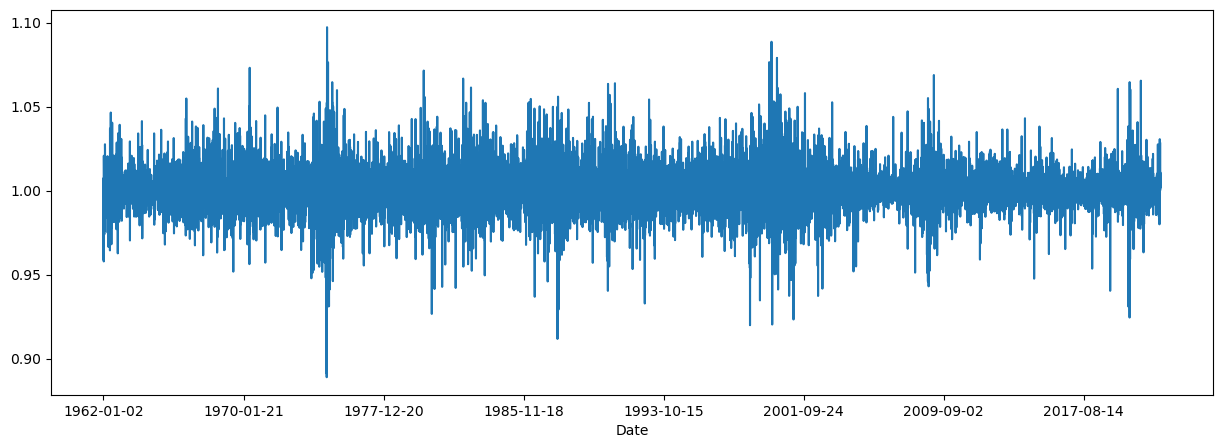

In [4]:
data = data_pd.High.div(data_pd.High.shift())
data.plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

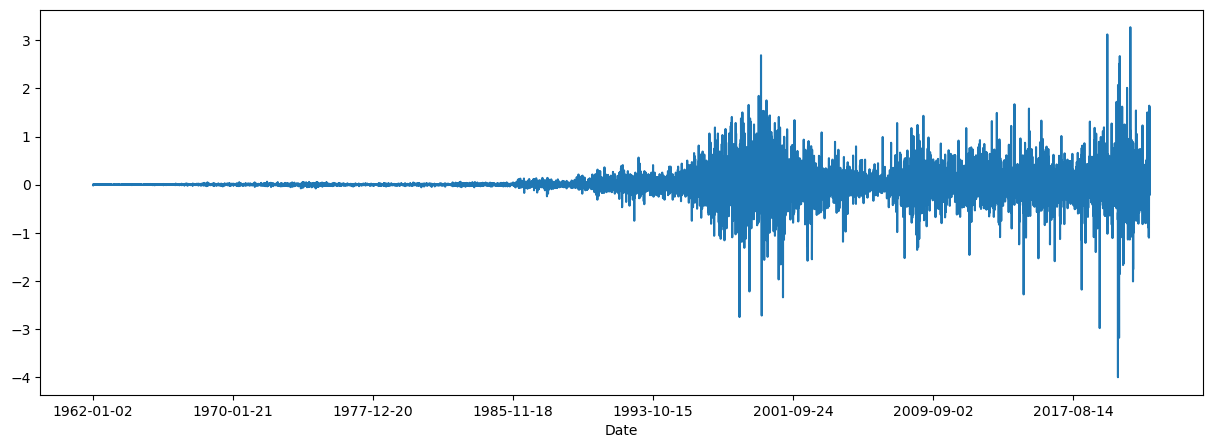

In [5]:
data_pd.High.diff().plot(figsize=(15,5))

In [38]:
trace = go.Ohlc(x = data_pd.index,
                open = data_pd.Open,
                high = data_pd.High,
                low = data_pd.Low,
                close = data_pd.Close)

data = [trace]
iplot(data)

In [35]:
data_2020 = data_pd.query('Date > "2020-01-01" & Date < "2020-07-01"')

In [37]:
trace = go.Ohlc(x = data_2020.index,
                open = data_2020.Open,
                high = data_2020.High,
                low = data_2020.Low,
                close = data_2020.Close)

data = [trace]
iplot(data) # Widać covid-19 - opisać jakoś ładnie jak już będziesz wiedzieć

In [39]:
trace = go.Candlestick(x = data_pd.index,
                open = data_pd.Open,
                high = data_pd.High,
                low = data_pd.Low,
                close = data_pd.Close)
data = [trace]
iplot(data)

In [21]:
trace = go.Candlestick(x = data_2020.index,
                open = data_2020.Open,
                high = data_2020.High,
                low = data_2020.Low,
                close = data_2020.Close)
data = [trace]
iplot(data)

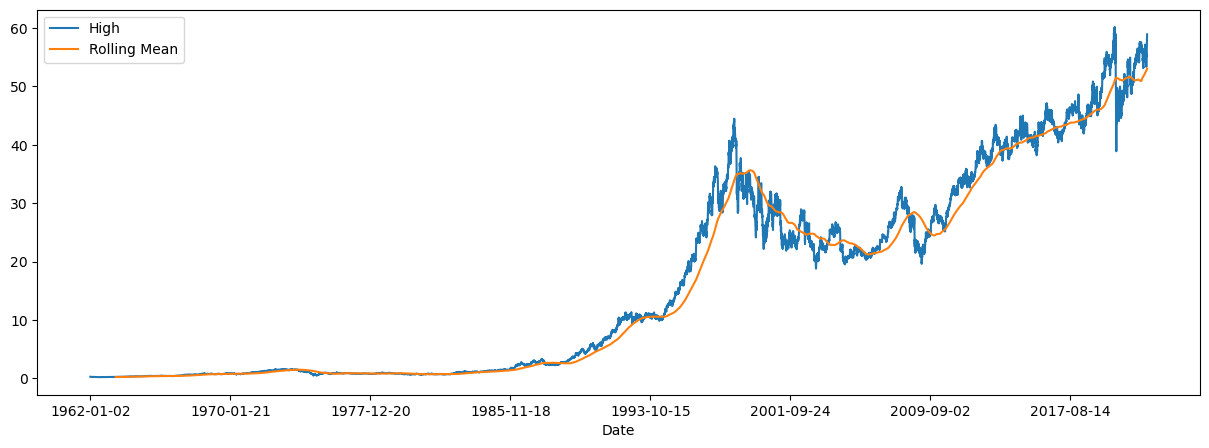

In [10]:
# Window functions

rolling_data = data_pd.High.rolling(365).mean()
data_pd.High.plot(figsize=(15,5))
rolling_data.plot(figsize=(15,5))
plt.legend(['High', 'Rolling Mean'])
plt.show()

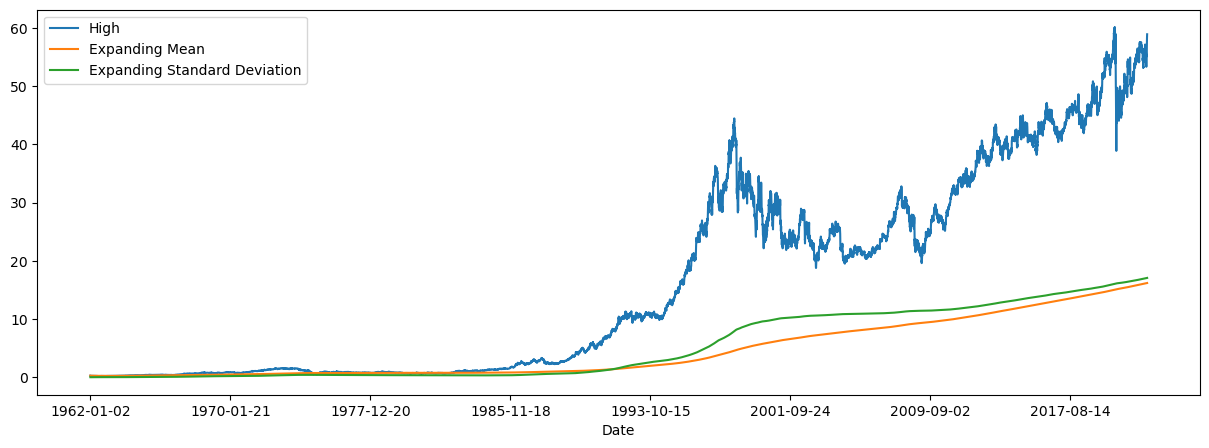

In [11]:
# Expanding window function - doczytać co to jest za funkcja

data_mean = data_pd.High.expanding().mean()
data_std = data_pd.High.expanding().std()
data_pd.High.plot(figsize=(15,5))
data_mean.plot(figsize=(15,5))
data_std.plot(figsize=(15,5))
plt.legend(['High', 'Expanding Mean', 'Expanding Standard Deviation'])
plt.show()